Analyzing initial tests using LOX in the Biomark instrument.<br/><br/>Copyright (C) 2020  Martin Engqvist<br/>This program is free software: you can redistribute it and/or modify<br/>it under the terms of the GNU General Public License as published by<br/>the Free Software Foundation, either version 3 of the License, or<br/>(at your option) any later version.<br/>This program is distributed in the hope that it will be useful,<br/>but WITHOUT ANY WARRANTY; without even the implied warranty of<br/>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br/>GNU General Public License for more details.<br/>You should have received a copy of the GNU General Public License<br/>along with this program.  If not, see <http://www.gnu.org/licenses/>.

### Exploration of Fluidigm's capability to detect enzyme activity. Comparison of buffer conditions on the readout 

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
from os.path import join, dirname, basename, exists, isdir

### Load environmental variables from the project root directory ###
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

# now you can get the variables using their names

# Check whether a network drive has been specified
DATABASE = os.environ.get("NETWORK_URL")
if DATABASE == 'None':
    pass
else:
    pass
    #mount network drive here

# set up directory paths
CURRENT_DIR = os.getcwd()
PROJ = dirname(dotenv_path) # project root directory

DATA = join(PROJ, 'data') #data directory
RAW_EXTERNAL = join(DATA, 'raw_external') # external data raw directory
RAW_INTERNAL = join(DATA, 'raw_internal') # internal data raw directory
INTERMEDIATE = join(DATA, 'intermediate') # intermediate data directory
FINAL = join(DATA, 'final') # final data directory

RESULTS = join(PROJ, 'results') # output directory
FIGURES = join(RESULTS, 'figures') # figure output directory
PICTURES = join(RESULTS, 'pictures') # picture output directory


# make folders specific for certain data
folder_name = ''
if folder_name != '':
    #make folders if they don't exist
    if not exists(join(RAW_EXTERNAL, folder_name)):
        os.makedirs(join(RAW_EXTERNAL, folder_name))

    if not exists(join(INTERMEDIATE, folder_name)):
        os.makedirs(join(INTERMEDIATE, folder_name))

    if not exists(join(FINAL, folder_name)):
        os.makedirs(join(FINAL, folder_name))

print('Standard variables loaded, you are good to go!')



Standard variables loaded, you are good to go!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading data from the ROX channel detecting resorufin fluorescence 

df = pd.read_csv(join(INTERMEDIATE, 'flex_six_first_test', 'LOX_optimization_ROX.tsv'), sep = '\t')
df

,Chamber_ID,enzyme_concentration,substrate,detergent_conc,BSA,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,S06-A01,50,none,0.01,no,9345,9741,10062,10353,10596,10815,11026,11205,11378,11534,11657,11810,11931,12085,12203
1,S05-A01,20,none,0.01,no,7873,8162,8412,8614,8812,8977,9134,9275,9413,9529,9653,9753,9877,9976,10081
2,S04-A01,10,none,0.01,no,7991,8281,8526,8743,8945,9125,9280,9433,9575,9708,9831,9944,10055,10177,10279
3,S03-A01,5,none,0.01,no,6721,6946,7142,7321,7473,7608,7748,7856,7975,8063,8179,8253,8357,8448,8540
4,S02-A01,1,none,0.01,no,6098,6292,6470,6622,6767,6889,7001,7107,7207,7302,7397,7484,7573,7643,7737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,S11-A12,20,lactate,0.10,yes,34223,39171,44426,49857,53737,55977,57365,58534,59540,60379,61179,61649,61907,62110,62311
140,S10-A12,10,lactate,0.10,yes,21397,23995,26705,29497,32342,35177,38111,41057,43977,46912,49815,52221,53763,54967,55967
141,S09-A12,5,lactate,0.10,yes,16392,18005,19651,21313,22972,24578,26247,27931,29569,31191,32837,34477,36062,37679,39256
142,S08-A12,1,lactate,0.10,yes,10180,10760,11282,11758,12219,12647,13048,13431,13805,14159,14497,14838,15162,15494,15818


In [4]:
#creacte sub dataframes with divisions on substrate type (either none or lactate), BSA or detergent content

lactate_df = df[df.substrate == "lactate"]
lactate_df_BSA = lactate_df[lactate_df.BSA == 'yes']
lactate_df_no_BSA = lactate_df[lactate_df.BSA == 'no']
lactate_df_low_deterg = lactate_df[lactate_df.detergent_conc == 0.01]
lactate_df_high_deterg = lactate_df[lactate_df.detergent_conc == 0.1]

no_substrate_df = df[df.substrate == "none"]
no_substrate_df_BSA = no_substrate_df[no_substrate_df.BSA == 'yes']
no_substrate_df_no_BSA = no_substrate_df[no_substrate_df.BSA == 'no']
no_substrate_df_low_detergent = no_substrate_df[no_substrate_df.detergent_conc == 0.01]
no_substrate_df_high_detergent = no_substrate_df[no_substrate_df.detergent_conc == 0.1]

In [5]:
#statistics: for each df average and standard deviation

#for BSA vs no BSA comparison - only for lactate
lactate_df_BSA_mean = lactate_df_BSA.groupby(by = "enzyme_concentration").mean()
lactate_df_BSA_stdev = lactate_df_BSA.groupby(by = "enzyme_concentration").std()
lactate_df_no_BSA_mean = lactate_df_no_BSA.groupby(by = "enzyme_concentration").mean()
lactate_df_no_BSA_stdev = lactate_df_no_BSA.groupby(by = "enzyme_concentration").std()

#for high vs low detergent comparison - for both lactate and no substrate
lactate_df_low_deterg_mean = lactate_df_low_deterg.groupby(by = "enzyme_concentration").mean()
lactate_df_low_deterg_stdev = lactate_df_low_deterg.groupby(by = "enzyme_concentration").std()
lactate_df_high_deterg_mean = lactate_df_high_deterg.groupby(by = "enzyme_concentration").mean()
lactate_df_high_deterg_stdev = lactate_df_high_deterg.groupby(by = "enzyme_concentration").std()

no_substrate_df_low_detergent_mean = no_substrate_df_low_detergent.groupby(by = "enzyme_concentration").mean()
no_substrate_df_low_detergent_stdev = no_substrate_df_low_detergent.groupby(by = "enzyme_concentration").std()
no_substrate_df_high_detergent_mean = no_substrate_df_high_detergent.groupby(by = "enzyme_concentration").mean()
no_substrate_df_high_detergent_stdev = no_substrate_df_high_detergent.groupby(by = "enzyme_concentration").std()

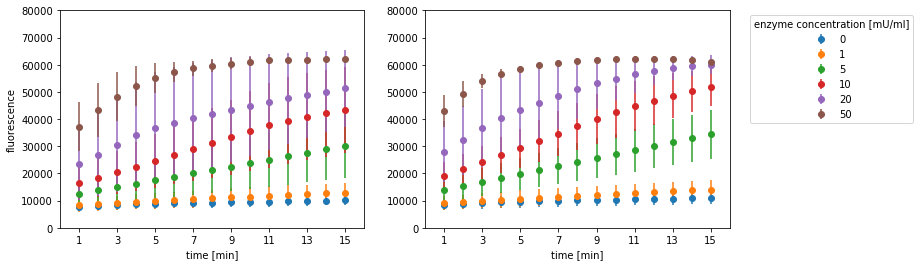

In [6]:
# plotting comparison of BSA vs no BSA in the buffer - for LOX + lactate, supplementary figure 3A

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))

plt.style.use('default')

lactate_df_BSA_mean.T[1:].plot(yerr = lactate_df_BSA_stdev.T, fmt='o', ax = ax1, legend = False)
ax1.set_xlim((-1,15))
ax1.set_ylabel("fluorescence")
ax1.set_xlabel("time [min]")
ax1.set_ylim((0, 80000))

lactate_df_no_BSA_mean.T[1:].plot(yerr = lactate_df_no_BSA_stdev.T, fmt='o', ax = ax2 )
legend = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = "enzyme concentration [mU/ml]")
ax2.set_xlim((-1,15))
ax2.set_xlabel("time [min]")
ax2.set_ylim((0, 80000))


plt.savefig(join(FIGURES, "Supplementary_figure_3_BSA_comparison.pdf"), 
            bbox_extra_artists=(legend,), 
            bbox_inches='tight')

No handles with labels found to put in legend.


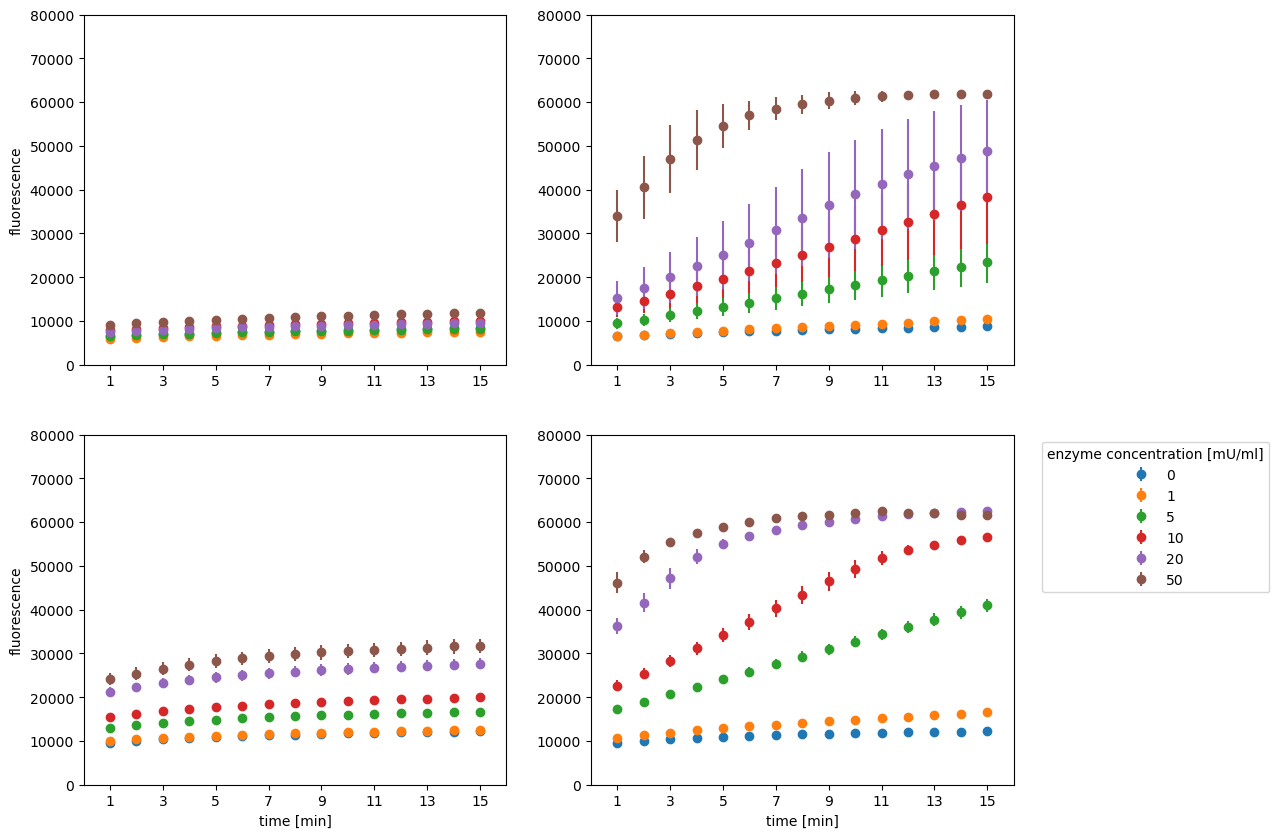

In [7]:
# plotting comparison of detergent concentrations in the buffer - for LOX+lactate and LOX with no substrate, Supplementary figure 3B


fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize = (12,10))
plt.style.use('default')

no_substrate_df_low_detergent_mean.T[1:].plot(yerr = no_substrate_df_low_detergent_stdev.T, fmt='o', ax = ax1, legend = False)
ax1.set_xlim((-1,15))
ax1.set_ylim((0, 80000))
ax1.set_ylabel("fluorescence")

lactate_df_low_deterg_mean.T[1:].plot(yerr = lactate_df_low_deterg_stdev.T, fmt='o', ax = ax3, legend = False )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = "enzyme concentration [mU/ml]")
ax3.set_xlim((-1,15))
ax3.set_ylim((0, 80000))
      
no_substrate_df_high_detergent_mean.T[1:].plot(yerr = no_substrate_df_high_detergent_stdev.T, fmt='o', ax = ax2, legend = False)
ax2.set_xlim((-1,15))
ax2.set_ylim((0, 80000))
ax2.set_xlabel("time [min]")
ax2.set_ylabel("fluorescence")

lactate_df_high_deterg_mean.T[1:].plot(yerr = lactate_df_high_deterg_stdev.T, fmt='o', ax = ax4 )
legend = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = "enzyme concentration [mU/ml]")
ax4.set_xlim((-1,15))
ax4.set_ylim((0, 80000))
ax4.set_xlabel("time [min]")


plt.savefig(join(FIGURES, "Supplementary_figure_3_detergents_comparison.pdf"), 
                 bbox_extra_artists=(legend,), 
                 bbox_inches='tight')

In [8]:
# sample loading data - fluorescein signal from FAM channel

loading_df = pd.read_csv(join(INTERMEDIATE, 'flex_six_first_test', 'LOX_optimization_FAM.tsv'), sep = "\t")
loading_df

,Chamber ID,enzyme_concentration,substrate,detergent_conc,BSA,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,S06-A01,50,none,0.01,no,8046,8157,8271,8370,8459,8546,8622,8692,8767,8822,8877,8946,8986,9008,9050
1,S05-A01,20,none,0.01,no,8081,8204,8300,8384,8474,8552,8635,8704,8765,8826,8877,8940,8981,9028,9073
2,S04-A01,10,none,0.01,no,8433,8549,8633,8730,8820,8905,8985,9056,9120,9184,9236,9286,9323,9379,9429
3,S03-A01,5,none,0.01,no,8497,8615,8722,8819,8911,8997,9074,9145,9209,9276,9337,9381,9441,9480,9520
4,S02-A01,1,none,0.01,no,8561,8684,8793,8882,8979,9067,9137,9215,9277,9340,9396,9450,9495,9547,9589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,S11-A12,20,lactate,0.10,yes,7068,7172,7274,7360,7439,7499,7574,7634,7692,7739,7777,7825,7859,7896,7919
140,S10-A12,10,lactate,0.10,yes,7141,7244,7339,7428,7502,7593,7666,7730,7791,7855,7901,7955,7986,8040,8062
141,S09-A12,5,lactate,0.10,yes,7178,7290,7390,7474,7562,7638,7722,7786,7854,7915,7974,8011,8058,8105,8151
142,S08-A12,1,lactate,0.10,yes,7111,7214,7328,7424,7509,7600,7674,7742,7820,7878,7931,7988,8047,8105,8118


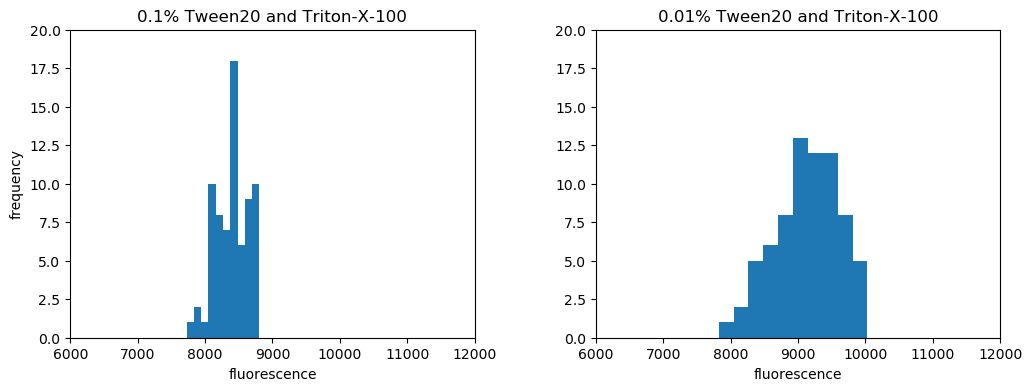

In [9]:
#plotting distribution of fluorescein signal, comparison of buffers with different detergent concentration, Supplementray figure 4

loading_high_detergent = loading_df[loading_df.detergent_conc == 0.1]
loading_low_detergent = loading_df[loading_df.detergent_conc == 0.01]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))

loading_high_detergent.hist(column='15', grid = False, ax = ax1)
ax1.set_xlabel('fluorescence')
ax1.set_ylabel('frequency')
ax1.set_ylim((0, 20))
ax1.set_xlim((6000, 12000))
ax1.set_title('0.1% Tween20 and Triton-X-100')


loading_low_detergent.hist(column='15', grid = False, ax = ax2)
ax2.set_xlabel('fluorescence')
ax2.set_ylim((0, 20))
ax2.set_xlim((6000, 12000))
ax2.set_title('0.01% Tween20 and Triton-X-100')

plt.savefig(join(FIGURES, "Supplementary_figure_4_loading_control.pdf"))